<a href="https://colab.research.google.com/github/Indian1999/csutortok_17/blob/main/Sz%C3%ADnes_k%C3%A9pek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
labels, counts = np.unique(y_train, return_counts=True)
print(labels)
print(counts)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


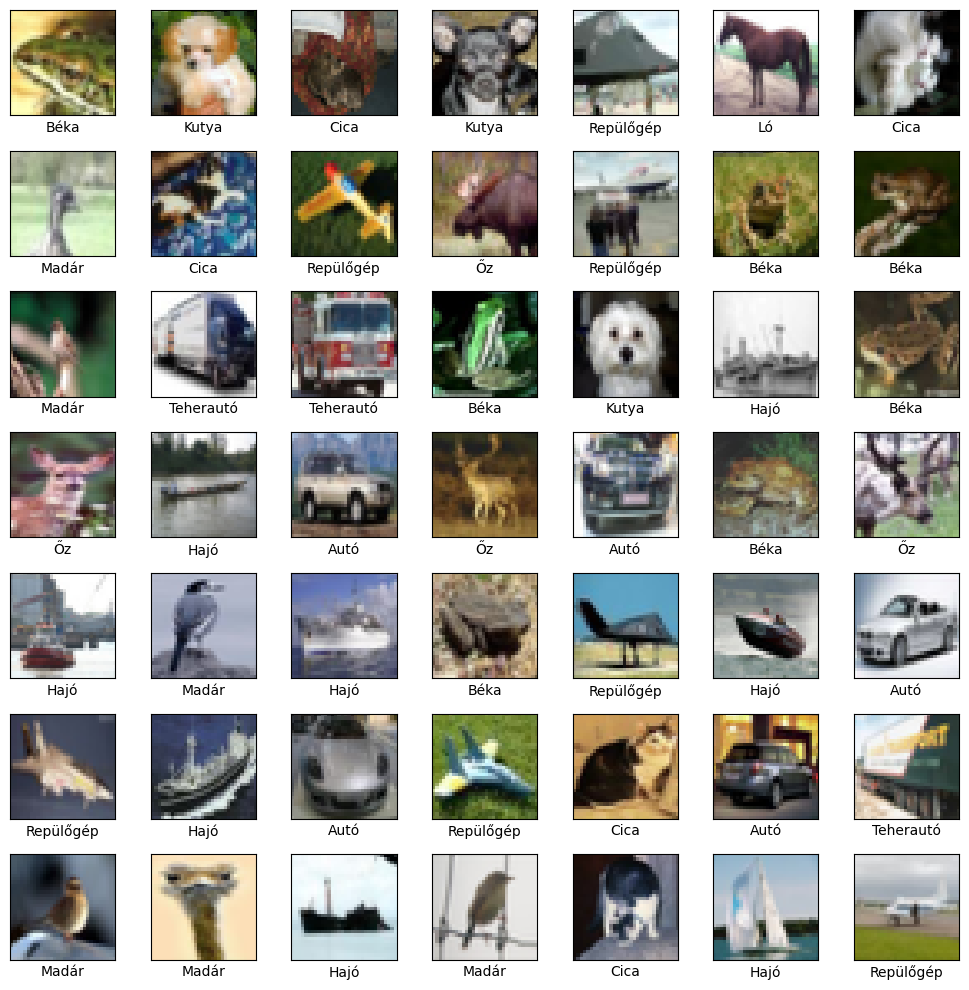

In [10]:
indeces = np.random.randint(0, len(x_train), size = 49)
images = x_train[indeces]
images_labels = y_train[indeces]
labels = ["Repülőgép", "Autó", "Madár", "Cica", "Őz", "Kutya", "Béka", "Ló", "Hajó", "Teherautó"]

plt.figure(figsize=(10, 10))
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(images[i])
    plt.xlabel(labels[images_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()